# Trabajo Practico de Laboratorio 2 - Filtros digitales
# Calculo de coeficientes de filtros

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pytc2.sistemas_lineales import plot_plantilla
    

# Filtro A - FIR Equiripple pasa bajos

Coeficientes para implementar en codigo:
{-0.00042224699780078745, 2.8428445667953377e-05, 5.364376291361107e-05, 9.434634111801916e-05, 0.00014825363457685498, 0.0002123265319899668, 0.0002824235686431826, 0.00035360062197422075, 
0.00041995863377408313, 0.00047517453413240446, 0.0005124749020848981, 0.0005253875233279179, 0.000507746220943769, 0.0004547544286882922, 0.0003628843823530595, 0.00023086111271085184, 
5.9660284074546826e-05, -0.00014680480776471495, -0.00038193211567093916, -0.0006359671509891796, -0.0008967692365030192, -0.0011494885190492952, -0.0013780351756904597, -0.0015649900522676473, 
-0.0016931682173728579, -0.0017461496908990385, -0.0017099488628027416, -0.0015733647342695317, -0.001329996818178131, -0.000978057897051023, -0.0005227058008951597, 2.5566256492185888e-05, 
0.0006472564999517908, 0.0013199408930410674, 0.0020132045034694126, 0.0026906184073519665, 0.0033147020493039417, 0.0038441251315737943, 0.004238928156546036, 0.004460472570574703, 
0.0044755182

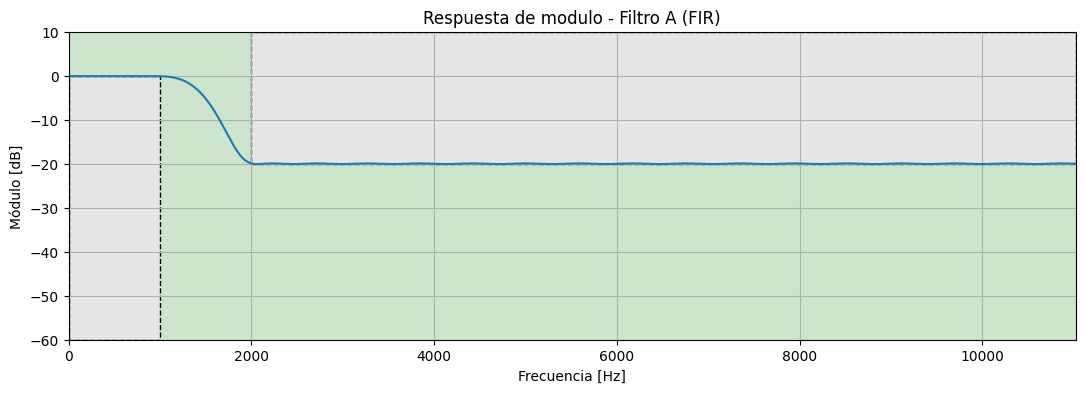

In [2]:
# Parametros del filtro

fs = 44100

num_taps= 151

att_pass = 0.1 # dB
att_stop = 20 # dB

wp1 = 1000 #Hz
ws1 = 2000 #Hz

# Calculos

gains_db = np.array([-att_pass, -att_pass, -att_stop, -att_stop])
gains = 10**(gains_db/20)

taps_fir_1 = signal.remez(num_taps, [0.0,  wp1,  ws1,  fs/2], gains[[1,2]], fs=fs)

# Imprimo coeficientes

print("Coeficientes para implementar en codigo:")
print('{', end='')
for i in range(len(taps_fir_1)):
    if(i%8 == 0 and i>0):
        print()
    print(f"{taps_fir_1[i]}", end='')
    if i != len(taps_fir_1)-1:
        print(', ', end='')
print('}')


mpl.rcParams['figure.figsize'] = (13,4)
plt.title('Respuesta de modulo - Filtro A (FIR)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([-2, fs/4, -60, 10 ]);

#Grafico de modulo teorico
fir_1_W, fir_1_H = signal.freqz(taps_fir_1, fs=fs, worN=10000)
plt.plot(fir_1_W, 20*np.log10(np.abs(fir_1_H)), label="Filtro A")

#Grafico plantilla
plot_plantilla(filter_type = 'lowpass', fpass=wp1, fstop=ws1, ripple=att_pass, attenuation=att_stop, fs = fs)




# Filtro B - FIR Least Squares elimina banda

Coeficientes para implementar en codigo:
{1.5825714011284631e-06, 3.121001910713791e-06, 1.3702888661206068e-06, -6.1252446127900605e-06, -1.633348294217095e-05, -2.0438711395832982e-05, -1.1278803520974315e-05, 6.9078926577001815e-06, 
1.834012183823587e-05, 1.0742710179849966e-05, -6.258607061405082e-06, -2.0920206984806225e-06, 4.5229289620857357e-05, 0.00011394138093304987, 0.00013913952373207966, 6.576780937302724e-05, 
-8.56644169210248e-05, -0.00021229142879239092, -0.00021179979420221306, -9.253189679847981e-05, 6.4242915253922695e-06, -6.0118944681537155e-05, -0.0002677450149970117, -0.00038116528196400487, 
-0.00014300757154796367, 0.0004405649606808186, 0.0010033051036744168, 0.0010778981578364207, 0.0005365728909582661, -0.00020883864551988481, -0.00052487722428306, -0.00018256017411523857, 
0.0003074182436040173, 8.973589023740585e-05, -0.0011482776526897664, -0.0026286991178013012, -0.0029548774583562677, -0.0013675610784264355, 0.0013363354184008037, 0.003251705134678876

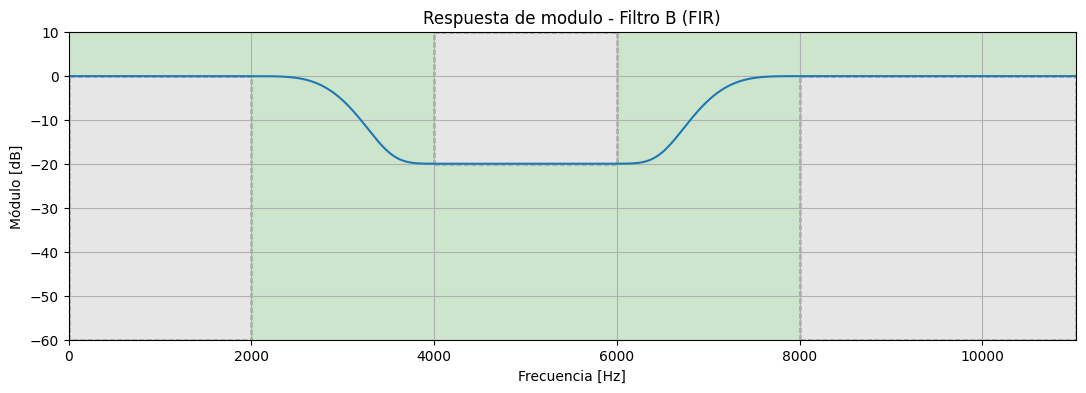

In [3]:
#Parametros del filtro

wp1 = 2e3
ws1 = 4e3
ws2 = 6e3
wp2 = 8e3

att_pass_db = 0.1
att_stop_db = 20

#Calculo filtro

gains_db = np.array([-att_pass_db, -att_pass_db, -att_stop_db, -att_stop_db, -att_pass_db, -att_pass_db])
gains = 10**(gains_db/20)

taps = signal.firls(num_taps, [0.0, wp1, ws1, ws2, wp2, fs/2], gains, fs=fs)

#Imprimo coeficientes

print("Coeficientes para implementar en codigo:")
print('{', end='')
for i in range(len(taps)):
    if(i%8 == 0 and i>0):
        print()
    print(f"{taps[i]}", end='')
    if i != len(taps)-1:
        print(', ', end='')
print('}')

mpl.rcParams['figure.figsize'] = (13,4)
plt.title('Respuesta de modulo - Filtro B (FIR)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([-2, fs/4, -60, 10 ]);

#Grafico modulo teorico
fir_W, fir_H = signal.freqz(taps, fs=fs, worN=10000)
plt.plot(fir_W, 20*np.log10(np.abs(fir_H)), label="Filtro FIR")

#Grafico plantilla
plot_plantilla(filter_type = 'bandstop', fpass=[wp1, wp2], fstop=[ws1, ws2], ripple=att_pass, attenuation=att_stop, fs = fs)





# Filtro C - IIR Butterworth

Coeficientes para implementar en codigo:
{0.019958067210378766, 0.03991613442075753, 0.019958067210378766, 1.466524930724182, -0.5397689941103483, 
0.019958067210378766, 0.03991613442075753, 0.019958067210378766, 1.5197669243533136, -0.5956701037725448, 
0.019958067210378766, 0.03991613442075753, 0.019958067210378766, 1.6290477627253344, -0.7104088600325765, 
0.019958067210378766, 0.03991613442075753, 0.019958067210378766, 1.797966990582587, -0.8877645831536425}

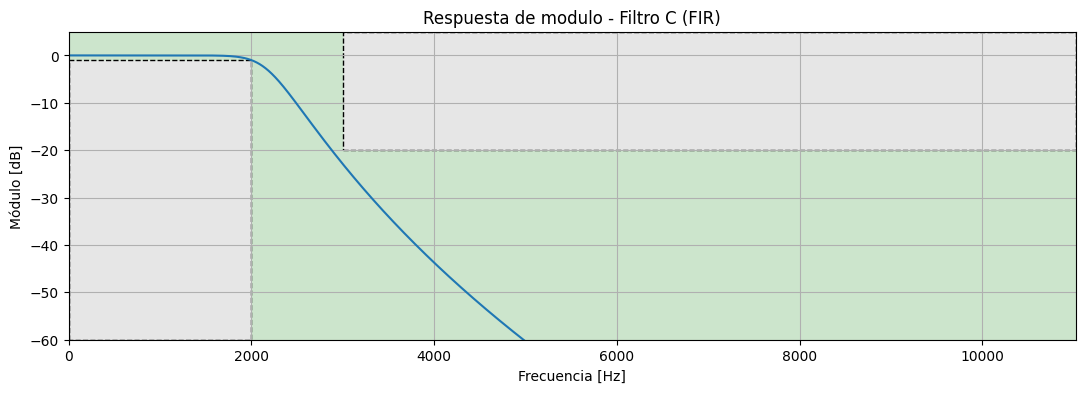

In [4]:
#Parametos del filtro

fs = 44.1e3

wc = 2e3
ws = 3e3
att_max_pass_db = 1
att_min_stop_db = 20

# Calculo de coeficientes
iir_sos = signal.iirdesign(wc, ws, att_max_pass_db, att_min_stop_db, ftype='butter', output='sos', analog=False, fs=fs)

a_coef = []
b_coef = []

for sos in iir_sos:
    b_coef.append(sos[:3])
    a_coef.append(sos[3:])

order = len(b_coef)
    
#Redistribucion de ganancias

total_gain = 1
for i in range(order):
    total_gain *= b_coef[i][0]

for i in range(order):
    b_coef[i][1] *= (total_gain**(1/(order)))/b_coef[i][0]
    b_coef[i][2] *= (total_gain**(1/(order)))/b_coef[i][0]
    b_coef[i][0] =  (total_gain**(1/(order)))

#Imprimo coeficientes

print("Coeficientes para implementar en codigo:")
print("{", end='')
for i in range(order):
    print(f"{b_coef[i][0]}, {b_coef[i][1]}, {b_coef[i][2]}, {-a_coef[i][1]}, {-a_coef[i][2]}", end='')
    if i != order-1:
        print(', ')
print("}", end='')

mpl.rcParams['figure.figsize'] = (13,4)
plt.title('Respuesta de modulo - Filtro C (FIR)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([-2, fs/4, -60, 5 ]);

#Grafico modulo teorico
iir_W, iir_H = signal.sosfreqz(iir_sos, fs=fs, worN=10000)
plt.plot(iir_W, 20*np.log10(np.abs(iir_H)), label="Filtro C")

#Grafico plantilla
plot_plantilla(filter_type = 'lowpass', fpass=wc, fstop=ws, ripple=att_max_pass_db, attenuation=att_min_stop_db, fs = fs)


